In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score,validation_curve, GridSearchCV
diabet = pd.read_csv("diabetes_dataset.csv")
diabet.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [2]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [3]:
diabet.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

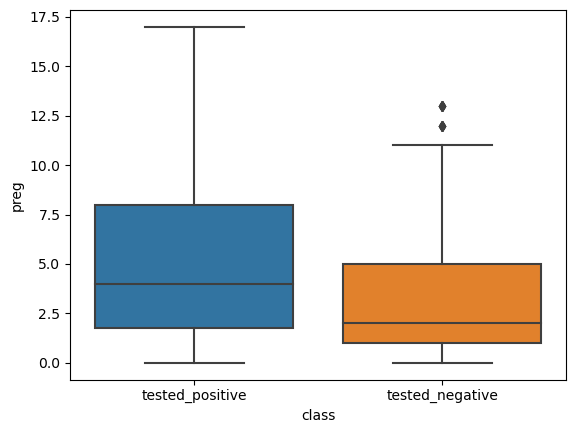

In [5]:
ax = sns.boxplot(data = diabet, x = 'class',  y = 'preg')

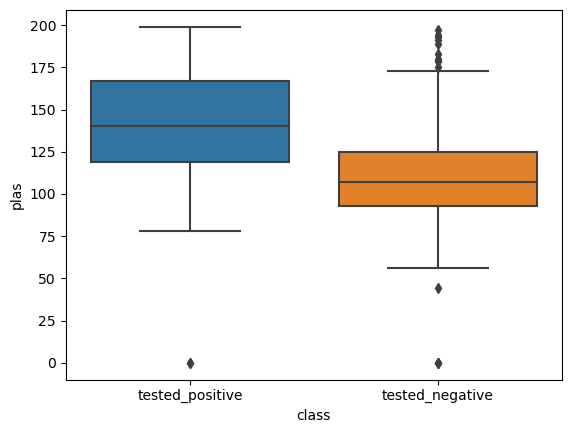

In [6]:
ax = sns.boxplot(data = diabet, x = 'class', y = 'plas')

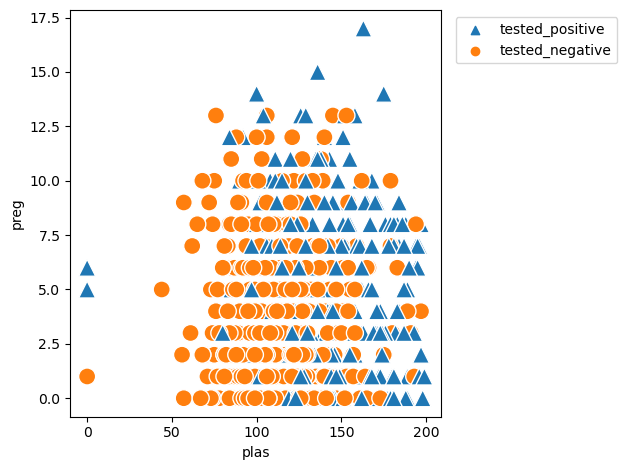

In [7]:
ax = sns.scatterplot(data = diabet, x = 'plas', y = 'preg', hue = 'class', style = 'class', markers = ['^', 'o'], s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')
plt.tight_layout() # optionally adjust plot layout

plt.savefig('DTDiaFig1.png')


In [8]:
y = diabet[['class']]

In [9]:
x = diabet[['plas', 'preg']]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, stratify = y, random_state = 1234)

In [11]:
x_train.shape, x_test.shape

((614, 2), (154, 2))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler().fit(x_train)

In [14]:
x_train_std = sc.transform(x_train)

In [15]:
x_test_std = sc.transform(x_test)

In [16]:
x_test_std

array([[ 0.57955059, -1.13695355],
       [ 0.20560114, -0.54182186],
       [-1.66414609, -1.13695355],
       [ 2.10651083, -1.13695355],
       [ 1.26512457,  0.94600739],
       [-1.13438438,  2.43383663],
       [ 1.32744948, -0.24425601],
       [-0.04369849, -1.13695355],
       [ 0.11211378,  0.35087569],
       [ 0.04978887, -0.54182186],
       [ 0.04978887, -0.54182186],
       [-0.94740965, -0.54182186],
       [-0.63578511, -0.8393877 ],
       [-1.04089701, -0.8393877 ],
       [-1.50833382,  1.54113909],
       [ 0.86001267, -0.24425601],
       [ 0.42373832,  1.54113909],
       [-0.29299812,  0.64844154],
       [ 0.14327623, -0.24425601],
       [ 1.0469874 ,  0.05330984],
       [-0.57346021, -0.8393877 ],
       [ 0.23676359,  0.05330984],
       [-1.3213591 , -0.24425601],
       [-0.44881039, -0.24425601],
       [-0.60462266, -1.13695355],
       [ 1.35861193,  1.54113909],
       [-0.76043493, -0.24425601],
       [-1.10322192,  0.35087569],
       [ 0.26792605,

In [17]:
from sklearn.tree import DecisionTreeClassifier


In [18]:
model = DecisionTreeClassifier(random_state = 1234)
t0 = time.time()
model.fit(x_train, y_train)
dtDia_time = time.time() - t0
print("DT model fitted in %.3f s" % dtDia_time)


DT model fitted in 0.006 s


In [19]:
model.score(x_test, y_test)

0.7337662337662337

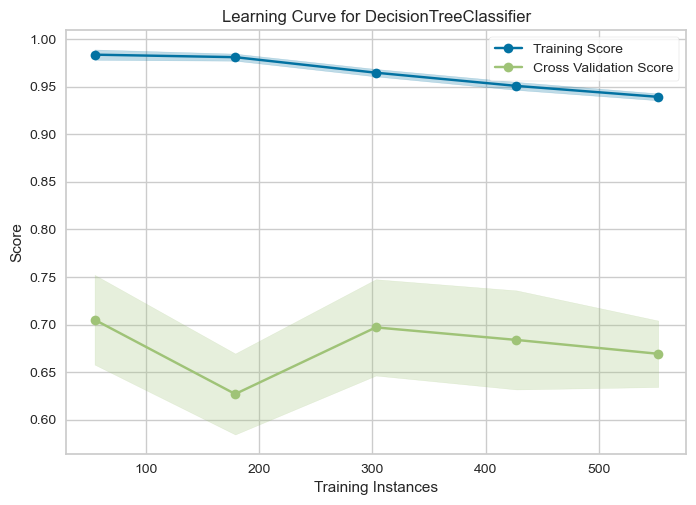

<Figure size 800x550 with 0 Axes>

In [20]:
from yellowbrick.model_selection import ValidationCurve, LearningCurve
import matplotlib.pyplot as plt
learning_curve = LearningCurve(model, cv=10)


# Fit the model on the training data
learning_curve.fit(x_train, y_train)

# Plot the learning curve
learning_curve.show()
plt.savefig("learning_curve.png")


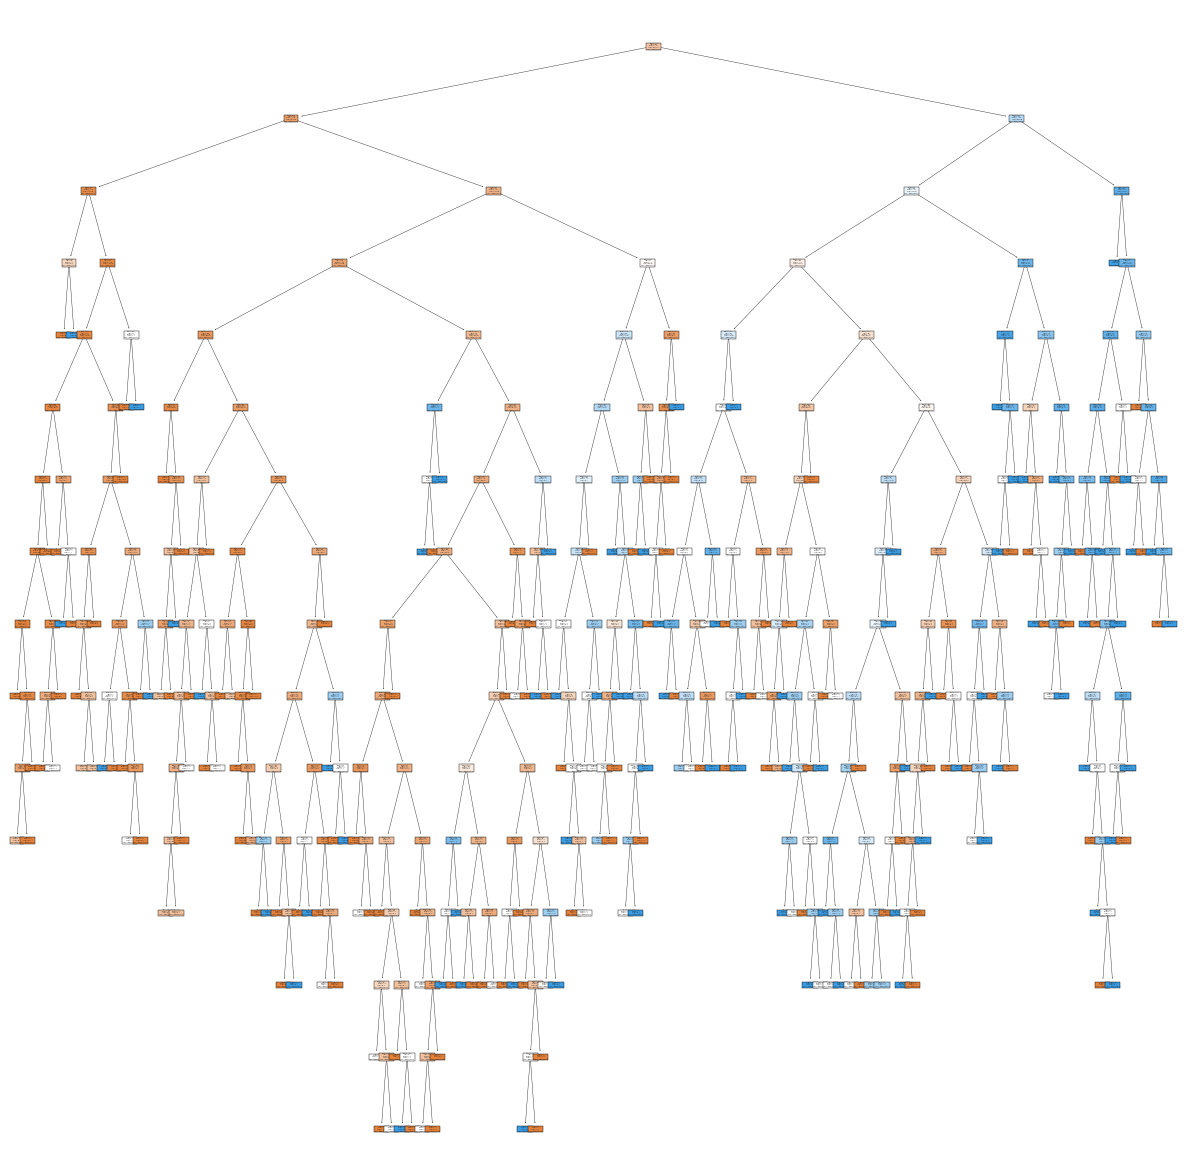

In [21]:
from sklearn import tree
plt.figure(figsize = (15, 15))
tree.plot_tree(model, feature_names = list(x.columns), class_names = ['tested_positive', 'tested_negative'], filled = True);

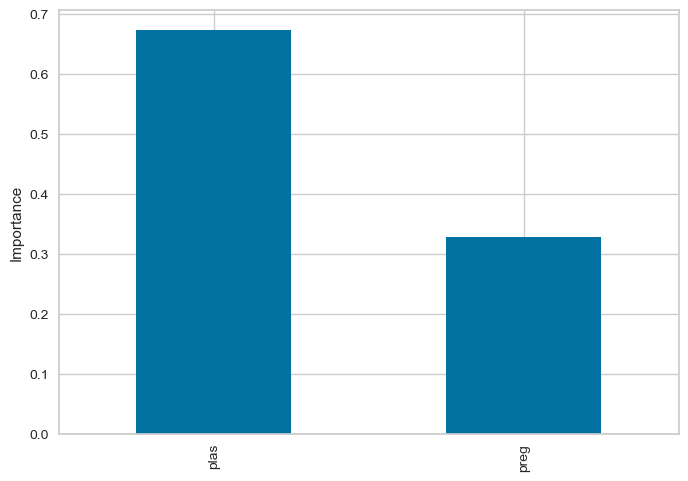

In [22]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = x.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

In [23]:
model.score(x_train, y_train)

0.9348534201954397

In [24]:
model.score(x_test, y_test)

0.7337662337662337

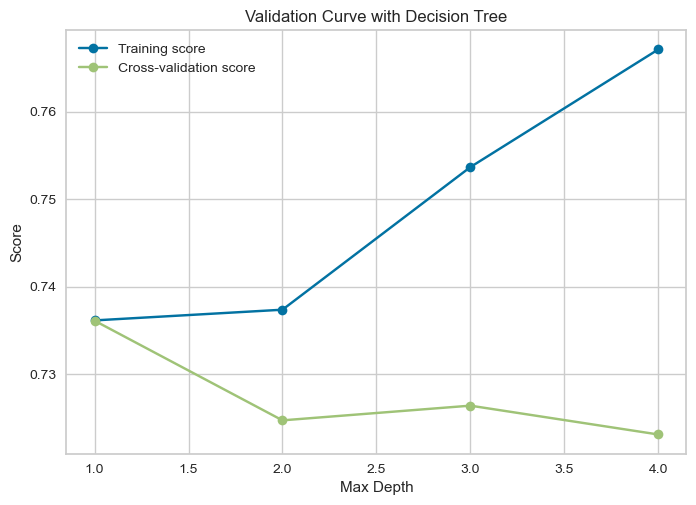

In [25]:
param_range = np.arange(1, 5, 1)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=0), x_train, y_train, param_name="max_depth", param_range=param_range, cv=5)


plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve with Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [26]:
grid = {'max_depth': [2, 3, 4, 5],
       'min_samples_split': [2, 3, 4],
       'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

In [27]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [28]:
model_ = gcv.best_estimator_
model_.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [29]:
model_.score(x_train, y_train)

0.750814332247557

In [30]:
model_.score(x_test, y_test)

0.7532467532467533

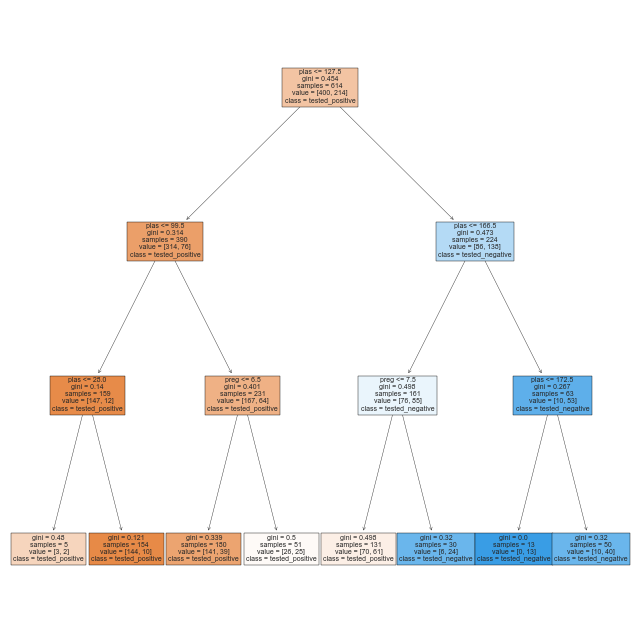

In [31]:
from sklearn import tree
plt.figure(figsize = (8, 8))
tree.plot_tree(model_, feature_names = list(x.columns), class_names = ['tested_positive', 'tested_negative'], 
              filled = True);

In [32]:
model = DecisionTreeClassifier(random_state = 1234)
t0 = time.time()
model.fit(x_train, y_train)
dtDia_time = time.time() - t0
print("DT model fitted in %.3f s" % dtDia_time)

DT model fitted in 0.012 s
